# Importing libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from numpy.linalg import inv
import random
import os

# Reading Dataset

In [2]:
dataset_path = 'C:/Users/User/Downloads/Python/ML/Assignment_2/'
dataset_dir  = os.listdir(dataset_path)

In [3]:
testing_tensor = np.ndarray((512,512,4), dtype = np.int_)

In [4]:
for i in range(4):
    img = plt.imread(dataset_path + str(i+1)+'.gif')
    testing_tensor[:,:,i] = np.array(img[:,:,0])

In [5]:
testing_tensor[:,:,i]

array([[42, 41, 40, ..., 32, 33, 33],
       [43, 43, 42, ..., 33, 33, 33],
       [43, 43, 41, ..., 35, 33, 33],
       ...,
       [33, 31, 33, ..., 22, 27, 24],
       [37, 33, 35, ..., 23, 31, 22],
       [39, 38, 38, ..., 25, 31, 22]])

# Plotting the training images

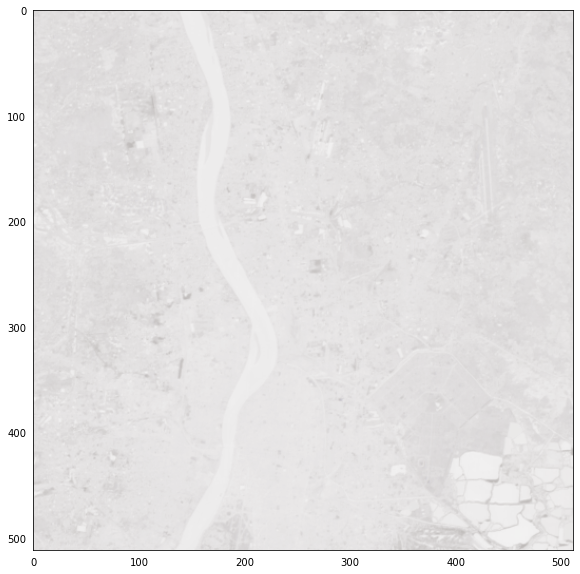

In [6]:
plt.subplot(1,1,1)
plt.imshow(testing_tensor)
plt.tick_params(labelleft=True, labelbottom=True, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.5, top=2.0)
plt.show()

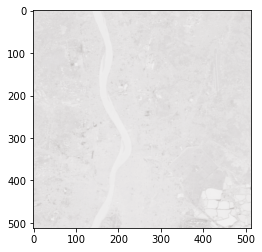

In [7]:
plt.imshow(testing_tensor)

In [8]:
ranges_for_1_r = [[144,5,162,20],
                [156,27,170,50],
                 [166,111,180,130],
                 [159,148,171,166],
                  [174,224,187,239],
                 [183,242,199,255],
                 [207,280,219,296],
                 [206,338,219,351],
                 [217,311,228,328],
                 [163,455,175,466]]

ranges_for_1_nr = [[43,82,137,183],
               [36,226,151,323],
               [25,374,156,460],
                  [205,16,321,163],
                  [364,15,487,121],
                  [211,185,334,260],
                  [365,144,496,266],
                  [248,275,397,385],
                  [409,297,499,495],
                  [210,404,387,492]]

coords_1_r=[]
coords_1_nr=[]

for i in range(len(ranges_for_1_r)):
    for x in range(ranges_for_1_r[i][0],ranges_for_1_r[i][2]+1):
        for y in range(ranges_for_1_r[i][1],ranges_for_1_r[i][3]+1):
            coords_1_r.append([x,y])

for i in range(len(ranges_for_1_nr)):
    for x in range(ranges_for_1_nr[i][0],ranges_for_1_nr[i][2]+1):
        for y in range(ranges_for_1_nr[i][1],ranges_for_1_nr[i][3]+1):
            coords_1_nr.append([x,y])
    
random.shuffle(coords_1_r)
random.shuffle(coords_1_nr)

# Sample Points

In [9]:
sample_x_r = np.array(coords_1_r)[0:50,0];sample_x_r
sample_y_r = np.array(coords_1_r)[0:50,0];sample_y_r

array([162, 187, 156, 161, 162, 188, 152, 226, 179, 163, 215, 156, 223,
       167, 168, 196, 213, 217, 167, 149, 168, 178, 166, 159, 159, 228,
       228, 213, 157, 149, 167, 227, 225, 158, 217, 173, 166, 223, 212,
       166, 165, 226, 193, 184, 183, 145, 170, 193, 215, 160])

In [10]:
sample_x_nr = np.array(coords_1_nr)[0:150,0];sample_x_nr
sample_y_nr = np.array(coords_1_nr)[0:150,0];sample_y_nr

array([224, 479, 414, 269,  70,  74, 292, 486, 304, 478, 334, 403,  80,
       467, 316, 129, 414, 460, 284, 435,  46, 375, 101, 366, 448, 243,
       477, 288, 434, 310, 318, 108, 393, 420, 308, 482, 497, 135, 409,
       123, 318,  66,  92, 134, 125, 207,  70, 445,  57, 276, 264,  81,
       112, 250, 468, 256, 338, 302,  43, 297, 227,  50, 289, 232, 459,
       366, 299, 491,  82, 321, 475, 367, 308, 245,  67, 469,  66, 135,
       464, 419, 260, 414, 479, 449,  68, 280, 301, 367, 474, 317, 312,
       132, 495, 321, 361, 265, 298, 252, 400, 414,  60, 271, 381, 129,
       126, 270,  94,  65,  79, 498, 263, 360, 216,  98, 402, 489, 494,
       450,  51, 481, 251,  93, 251, 459, 301, 307,  62, 263, 342, 335,
       208,  58, 331, 367, 251, 386, 223,  75, 376, 457,  27, 407, 315,
       115, 467, 476, 241, 245, 497,  97])

# Mean of river and non-river class

In [11]:
# mean of river class
t_r = [0,0,0,0]
a = np.ndarray(shape=(50,4))
for i in range(50):
    for j in range(4):
        t_r[j] = t_r[j] + testing_tensor[sample_x_r[i],sample_y_r[i],j]
        
for i in range(4):
    t_r[i] = t_r[i]/50

for i in range(50):
    a[i] = np.subtract(testing_tensor[sample_x_r[i],sample_y_r[i],:],t_r)

a.shape

(50, 4)

In [12]:
# mean of non_river class
t_nr = [0,0,0,0]
b = np.ndarray(shape=(150,4), dtype = np.float64)
for i in range(50):
    for j in range(4):
        t_nr[j] = t_nr[j] + testing_tensor[sample_x_nr[i],sample_y_nr[i],j]
        
for i in range(4):
    t_nr[i] = t_nr[i]/50

for i in range(50):
    b[i] = np.subtract(testing_tensor[sample_x_nr[i],sample_y_nr[i],:],t_nr)

b.shape

(150, 4)

# Covariance Matrix

In [13]:
cov_r = np.ndarray(shape=(4, 4))
cov_nr = np.ndarray(shape=(4, 4), dtype = np.float64)

for i in range(4):
    for j in range(4):
        cov_r[i][j]=np.dot(a[:,i],a[:,j])/50
        
print('Covariance of River class')
print(cov_r)

for i in range(4):
    for j in range(4):
        cov_nr[i][j]=np.dot(b[:,i],b[:,j])/100
print('\nCovariance of Non-river class')
print(cov_nr)

Covariance of River class
[[  5.6564   5.496    5.5932  -9.2548]
 [  5.496    6.68     6.448  -12.112 ]
 [  5.5932   6.448    7.0916 -11.9324]
 [ -9.2548 -12.112  -11.9324  36.2836]]

Covariance of Non-river class
[[ 3.9442  3.5334  5.5302  4.0092]
 [ 3.5334  3.6618  5.7754  5.0884]
 [ 5.5302  5.7754 11.3762  8.1452]
 [ 4.0092  5.0884  8.1452 30.7992]]


# Testing

In [14]:
inverse_cov_r = inv(cov_r)
inverse_cov_nr = inv(cov_nr)

In [15]:
def kol(i,j):
    r = np.subtract(testing_tensor[i,j,:],t_r)
    nr = np.subtract(testing_tensor[i,j,:],t_nr)

    river_class = np.dot(np.dot(r.T,inverse_cov_r), r)
    non_river_class = np.dot(np.dot(nr.T,inverse_cov_nr), nr)
    
# density functions

    det_cov_r = np.linalg.det(cov_r)
    p1 = (-0.5) * 1/np.sqrt(det_cov_r) * np.exp(river_class);

    det_cov_nr = np.linalg.det(cov_nr)
    p2 = (-0.5) * 1/np.sqrt(det_cov_nr) * np.exp(non_river_class);
    return p1,p2

In [16]:
def bayes(P1, P2):
    out_image=np.ndarray(shape=(512, 512), dtype = np.int64)
    for i in range(512):
        for j in range(512):
            p1,p2 = kol(i,j)
            if((P1 * p1) >= (P2 * p2)):
                out_image[i,j]=255
            else:
                out_image[i,j]=0            
    return out_image

In [17]:
sample_out_img = plt.imread(dataset_path + 'KOL.jpeg')
sample_out_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# P1=0.2, P2=0.8

<ipython-input-15-abfd02205f7f>:11: RuntimeWarning: overflow encountered in exp
  p1 = (-0.5) * 1/np.sqrt(det_cov_r) * np.exp(river_class);


Accuracy 71.13189697265625 %


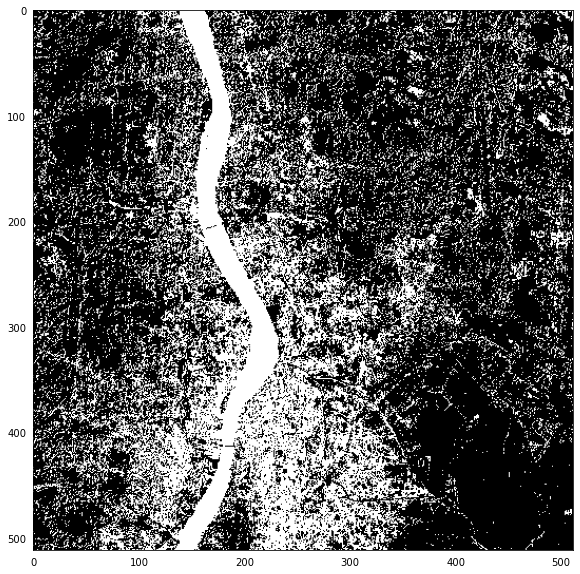

In [18]:
out_image1 = bayes(P1=0.3,P2=0.7)

count=0
for i in range(512):
    for j in range(512):
        if sample_out_img[i,j]==out_image1[i,j]:
            count = count+1
print('Accuracy',count*100/(512*512),'%')

plt.subplot(1,1,1)
plt.imshow(out_image1, cmap='gray')
plt.tick_params(labelleft=True, labelbottom=True, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.5, top=2.0)
plt.show()

# P1=0.5, P2=0.5

<ipython-input-15-abfd02205f7f>:11: RuntimeWarning: overflow encountered in exp
  p1 = (-0.5) * 1/np.sqrt(det_cov_r) * np.exp(river_class);


Accuracy 78.35006713867188 %


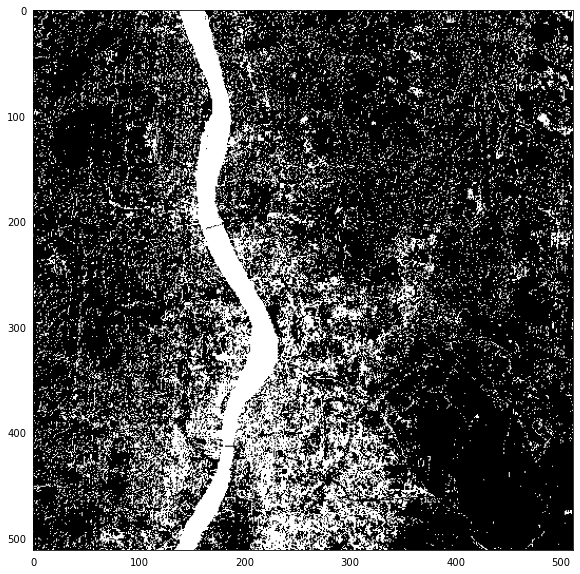

In [19]:
out_image2 = bayes(P1=0.5,P2=0.5)

count=0
for i in range(512):
    for j in range(512):
        if sample_out_img[i,j]==out_image2[i,j]:
            count = count+1
print('Accuracy',count*100/(512*512),'%')

plt.subplot(1,1,1)
plt.imshow(out_image2, cmap='gray')
plt.tick_params(labelleft=True, labelbottom=True, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.5, top=2.0)
plt.show()

# P1=0.8, P2=0.2

<ipython-input-15-abfd02205f7f>:11: RuntimeWarning: overflow encountered in exp
  p1 = (-0.5) * 1/np.sqrt(det_cov_r) * np.exp(river_class);


Accuracy 88.14315795898438 %


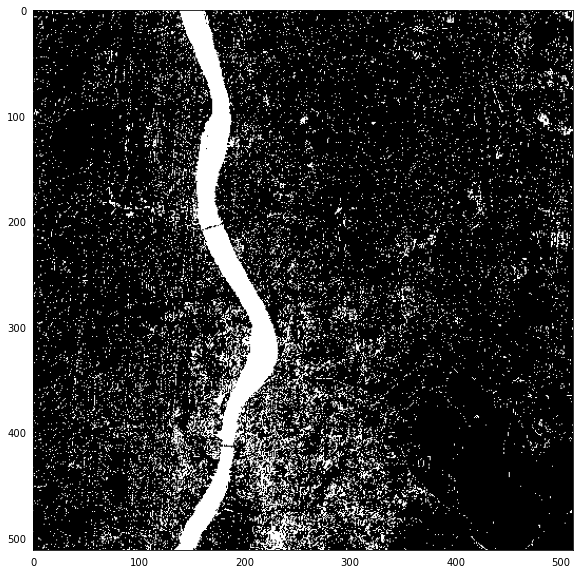

In [20]:
out_image3 = bayes(P1=0.8,P2=0.2)

count=0
for i in range(512):
    for j in range(512):
        if sample_out_img[i,j]==out_image3[i,j]:
            count = count+1
print('Accuracy',count*100/(512*512),'%')

plt.subplot(1,1,1)
plt.imshow(out_image3, cmap='gray')
plt.tick_params(labelleft=True, labelbottom=True, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.5, top=2.0)
plt.show()

# Accuracy vs P1

<ipython-input-15-abfd02205f7f>:11: RuntimeWarning: overflow encountered in exp
  p1 = (-0.5) * 1/np.sqrt(det_cov_r) * np.exp(river_class);
<ipython-input-16-12534251a597>:6: RuntimeWarning: invalid value encountered in double_scalars
  if((P1 * p1) >= (P2 * p2)):


Accuracy for 0.0 : 2.5424957275390625 %
Accuracy for 0.1 : 61.06300354003906 %
Accuracy for 0.2 : 66.180419921875 %
Accuracy for 0.3 : 71.13189697265625 %
Accuracy for 0.4 : 74.34577941894531 %
Accuracy for 0.5 : 78.35006713867188 %
Accuracy for 0.6 : 81.76918029785156 %
Accuracy for 0.7 : 84.85374450683594 %
Accuracy for 0.8 : 88.14315795898438 %
Accuracy for 0.9 : 91.12815856933594 %
Accuracy for 1.0 : 95.14427185058594 %


Text(0.5, 1.0, 'Accuracy vs. P1')

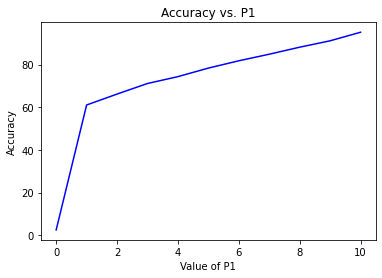

In [21]:
accuracy = np.zeros(11)
prob=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for k,item in enumerate(prob):
    x = bayes(P1=item,P2=(1-item))
    count=0
    for i in range(512):
        for j in range(512):
            if sample_out_img[i,j]==x[i,j]:
                count = count+1
    accuracy[k] = count*100/(512*512)
    print('Accuracy for',item,":",accuracy[k],'%')
    
fig, axi = plt.subplots()  
axi.plot(np.arange(11), accuracy, 'b')  
axi.set_xlabel('Value of P1')  
axi.set_ylabel('Accuracy')  
axi.set_title('Accuracy vs. P1') 